In [15]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
dat = pickle.load(open("extracted_files/extracted_raw.p", "rb"))
dat = list(filter(None, dat))
df = pd.DataFrame(dat)

In [17]:
df.columns

Index(['abstract', 'authors', 'cite_count', 'cover_date', 'doi', 'keywords',
       'publication_name', 'reference_count', 'subject_area', 'title', 'type',
       'volume'],
      dtype='object')

In [18]:
abstracts = " ".join(list(df.abstract))

In [19]:
abstracts = abstracts.lower()

In [20]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [21]:
words = word_tokenize(abstracts)

In [22]:
words

['©',
 '2017',
 'elsevier',
 'ltd',
 'a',
 'comprehensive',
 'public',
 'health',
 'strategy',
 'for',
 'adolescent',
 'suicide',
 'prevention',
 'includes',
 'upstream',
 'prevention',
 'strategies',
 ',',
 'strategies',
 'for',
 'risk',
 'recognition',
 ',',
 'and',
 'services',
 'for',
 'those',
 'at',
 'risk',
 '.',
 'interpersonal',
 'trauma',
 'and',
 'substance',
 'use',
 'are',
 'important',
 'prevention',
 'targets',
 'as',
 'each',
 'is',
 'associated',
 'with',
 'risk',
 'for',
 'suicide',
 'attempts',
 '.',
 'multiple',
 'prevention',
 'programs',
 'target',
 'these',
 'factors',
 ';',
 'however',
 ',',
 'the',
 'family',
 'check-up',
 ',',
 'designed',
 'to',
 'reduce',
 'substance',
 'use',
 'and',
 'behavioral',
 'problems',
 ',',
 'also',
 'has',
 'been',
 'associated',
 'with',
 'reduced',
 'suicide',
 'risk',
 '.',
 'several',
 'youth',
 'screening',
 'instruments',
 'have',
 'shown',
 'utility',
 ',',
 'and',
 'a',
 'large-scale',
 'trial',
 'is',
 'underway',
 'to',

In [23]:
keywords = pickle.load(open("keywords.p", "rb"))

In [24]:
also_keywords = []
for key in keywords:
    also_keywords.append(key.split())

keywords = []
for sublist in also_keywords:
    for item in sublist:
        keywords.append(item.lower())
keywords

['abductive',
 'logic',
 'programming',
 'abductive',
 'reasoning',
 'abstract',
 'data',
 'type',
 'abstraction',
 'accelerating',
 'change',
 'action',
 'language',
 'action',
 'model',
 'learning',
 'action',
 'selection',
 'adaptive',
 'algorithm',
 'adaptive',
 'neuro',
 'fuzzy',
 'inference',
 'system',
 'admissible',
 'heuristic',
 'affective',
 'computing',
 'agent',
 'architecture',
 'ai',
 'accelerator',
 'ai-complete',
 'algorithm',
 'algorithmic',
 'efficiency',
 'algorithmic',
 'probability',
 'alphago',
 'ambient',
 'intelligence',
 'analysis',
 'of',
 'algorithms',
 'answer',
 'set',
 'programming',
 'anytime',
 'algorithm',
 'application',
 'programming',
 'interface',
 'approximate',
 'string',
 'matching',
 'approximation',
 'error',
 'argumentation',
 'framework',
 'artificial',
 'immune',
 'system',
 'artificial',
 'intelligence',
 'artificial',
 'intelligence',
 'markup',
 'language',
 'artificial',
 'neural',
 'network',
 'association',
 'for',
 'the',
 'advanceme

In [25]:
key_dict = {}
for key in keywords:
    for word in words:
        if word.lower() == key.lower():
            if key in key_dict.keys():
                key_dict[key] += 1
            else:
                key_dict[key] = 1

In [26]:
key_dict

{'abstract': 12,
 'abstraction': 4,
 'accelerating': 2,
 'accelerator': 2,
 'acquisition': 22,
 'action': 84,
 'adaptive': 138,
 'admissible': 2,
 'advancement': 7,
 'agent': 99,
 'ai': 117,
 'algorithm': 5418,
 'algorithmic': 22,
 'algorithms': 366,
 'alphago': 3,
 'ambient': 16,
 'amplification': 1,
 'analysis': 1107,
 'and': 11298,
 'annealing': 7,
 'answer': 8,
 'anytime': 1,
 'application': 149,
 'approach': 418,
 'approximate': 13,
 'approximation': 20,
 'architecture': 82,
 'argumentation': 11,
 'artificial': 2754,
 'assistant': 4,
 'association': 37,
 'asymptotic': 2,
 'augmented': 5,
 'automata': 9,
 'automated': 54,
 'autonomic': 1,
 'autonomous': 44,
 'averaging': 5,
 'backpropagation': 3,
 'backward': 1,
 'batch': 9,
 'bayesian': 32,
 'bees': 3,
 'behavior': 158,
 'big': 104,
 'binary': 36,
 'binding': 1,
 'bio-inspired': 7,
 'blue': 8,
 'boolean': 16,
 'boundary': 19,
 'brain': 29,
 'branching': 6,
 'brute-force': 1,
 'calculus': 12,
 'car': 5,
 'carlo': 6,
 'case-based': 

In [27]:
import operator
# x = {1: 2, 3: 4, 4: 3, 2: 1, 0: 0}
sorted_x = sorted(key_dict.items(), key=operator.itemgetter(1))

In [28]:
for_plotting = sorted_x[-15:]

In [29]:
for_plotting

[('problem', 1668),
 ('optimization', 1692),
 ('computational', 1988),
 ('model', 2052),
 ('for', 2084),
 ('intelligence', 2590),
 ('artificial', 2754),
 ('network', 2888),
 ('algorithm', 5418),
 ('learning', 6258),
 ('system', 8138),
 ('data', 8352),
 ('and', 11298),
 ('the', 12384),
 ('of', 38465)]

In [30]:
to_remove = "of,the,and,for,a,i,in,an"
to_remove = to_remove.split(",")
to_remove

['of', 'the', 'and', 'for', 'a', 'i', 'in', 'an']

In [31]:
# for i, val in enumerate(for_plotting):
#     print(i,val)
#     if key in to_remove:
i = 0
while 1:
    if for_plotting[i][0] in to_remove:
        del for_plotting[i]
    else:
        i += 1
    if i >= len(for_plotting):
        break

In [32]:
for_plotting

[('problem', 1668),
 ('optimization', 1692),
 ('computational', 1988),
 ('model', 2052),
 ('intelligence', 2590),
 ('artificial', 2754),
 ('network', 2888),
 ('algorithm', 5418),
 ('learning', 6258),
 ('system', 8138),
 ('data', 8352)]

In [33]:
x = []
y = []
for val in for_plotting:
    x.append(val[0])
    y.append(val[1])
# pickle.dump([x,y], open("for_plotting.p", "wb"))

In [34]:
# x, y = pickle.load(open("for_plotting.p", "rb"))

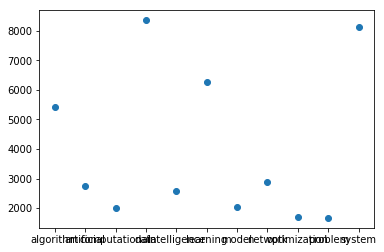

In [35]:
plt.scatter(x,y)
plt.show()

In [37]:
li = list(df.subject_area)

In [38]:
flat_li = []
for sublist in li:
    for item in sublist:
        flat_li.append(item)

In [39]:
flat_li

['Psychology (all)',
 'Software',
 'Signal Processing',
 'Information Systems',
 'Hardware and Architecture',
 'Software',
 'Signal Processing',
 'Information Systems',
 'Hardware and Architecture',
 'Software',
 'Signal Processing',
 'Information Systems',
 'Hardware and Architecture',
 'Software',
 'Signal Processing',
 'Information Systems',
 'Hardware and Architecture',
 'Software',
 'Signal Processing',
 'Information Systems',
 'Hardware and Architecture',
 'Software',
 'Signal Processing',
 'Information Systems',
 'Hardware and Architecture',
 'Decision Sciences (all)',
 'Software',
 'Signal Processing',
 'Information Systems',
 'Hardware and Architecture',
 'Software',
 'Signal Processing',
 'Information Systems',
 'Hardware and Architecture',
 'Software',
 'Signal Processing',
 'Information Systems',
 'Hardware and Architecture',
 'Computer Science (all)',
 'Computer Science (all)',
 'Software',
 'Signal Processing',
 'Information Systems',
 'Hardware and Architecture',
 'Softw

In [41]:
from collections import Counter

In [42]:
count = Counter(flat_li)

In [43]:
count

Counter({'Acoustics and Ultrasonics': 4,
         'Aerospace Engineering': 18,
         'Agricultural and Biological Sciences (all)': 1,
         'Agronomy and Crop Science': 2,
         'Algebra and Number Theory': 6,
         'Analysis': 4,
         'Analytical Chemistry': 6,
         'Applied Mathematics': 65,
         'Applied Microbiology and Biotechnology': 1,
         'Artificial Intelligence': 205,
         'Arts and Humanities (miscellaneous)': 5,
         'Atomic and Molecular Physics, and Optics': 13,
         'Automotive Engineering': 14,
         'Behavioral Neuroscience': 1,
         'Biochemistry, Genetics and Molecular Biology (all)': 1,
         'Bioengineering': 4,
         'Biomaterials': 1,
         'Biomedical Engineering': 12,
         'Biophysics': 2,
         'Biotechnology': 1,
         'Building and Construction': 7,
         'Business and International Management': 7,
         'Business, Management and Accounting (all)': 1,
         'Chemical Engineering (all

In [44]:
sorted_count = sorted(count.items(), key=operator.itemgetter(1))

In [45]:
sorted_count

[('Biotechnology', 1),
 ('Electrochemistry', 1),
 ('Behavioral Neuroscience', 1),
 ('Pharmacology', 1),
 ('Drug Discovery', 1),
 ('Safety Research', 1),
 ('Public Health, Environmental and Occupational Health', 1),
 ('Medicine (all)', 1),
 ('Applied Microbiology and Biotechnology', 1),
 ('Marketing', 1),
 ('Development', 1),
 ('Sociology and Political Science', 1),
 ('Urban Studies', 1),
 ('Tourism, Leisure and Hospitality Management', 1),
 ('Toxicology', 1),
 ('Health, Toxicology and Mutagenesis', 1),
 ('Computational Mechanics', 1),
 ('Biomaterials', 1),
 ('Colloid and Surface Chemistry', 1),
 ('Developmental and Educational Psychology', 1),
 ('Surfaces and Interfaces', 1),
 ('Biochemistry, Genetics and Molecular Biology (all)', 1),
 ('Immunology and Microbiology (all)', 1),
 ('Agricultural and Biological Sciences (all)', 1),
 ('Earth and Planetary Sciences (miscellaneous)', 1),
 ('Geotechnical Engineering and Engineering Geology', 1),
 ('Ocean Engineering', 1),
 ('Microbiology', 1),

In [52]:
temp = sorted_count[-8:]

labels = []
sizes = []

for item in temp:
    labels.append(item[0])
    sizes.append(item[1])

labels.append("others")
sizes.append(1)

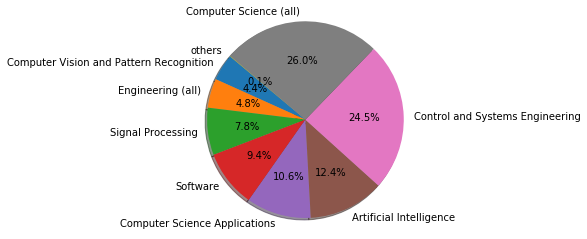

In [54]:
# Data to plot
# colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
# explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, labels=labels,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()